<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/RupeshThapa_Lab6_AdvancedKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Advanced Keras
##The 3 Keras Model APIs
### • Sequential. List-style stacked layers arranged input to output
### • Functional. Graph-like model architecture. Balanced combination of usability and flexibility. Most common API.
### • Subclassing. Low-level option to write all the code from scratch

## Sequential Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Build Sequential Model
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation= 'softmax')
])

In [ ]:
# model = keras.Sequential()
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.build(input_shape=(None,28,28))

In [ ]:
model.weights

[<tf.Variable 'dense_11/kernel:0' shape=(28, 64) dtype=float32, numpy=
 array([[ 0.068243  , -0.1492723 , -0.00283524, ..., -0.21701036,
         -0.10928635,  0.09568113],
        [ 0.07749248,  0.16467959,  0.18170044, ..., -0.2502404 ,
          0.21215817, -0.10130066],
        [-0.07444637, -0.09642418, -0.06180131, ..., -0.08186077,
          0.14952126, -0.06536032],
        ...,
        [ 0.14751214,  0.12700307, -0.12850259, ...,  0.14320287,
          0.13611159, -0.05353607],
        [-0.11496915,  0.19446576, -0.17938805, ..., -0.22461376,
         -0.19995236, -0.03261074],
        [ 0.15668586, -0.04738763, -0.1759687 , ..., -0.16880625,
         -0.11263421,  0.10593265]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(64,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
model = keras.Sequential(name="my_sequential_model")
model.add(layers.Dense(64, activation='relu', name="my_hidden_layer"))
model.add(layers.Dense(10, activation='softmax', name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_hidden_layer (Dense)     (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Functional Model

In [ ]:
# Define input shapes
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

In [ ]:
# Define Functional Model
functional_model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])

In [ ]:
import numpy as np
num_samples = 1280

# Generate dummy data
title_data = np.random.randint(0,2,size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2,size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [ ]:
# Compile the model
functional_model.compile(optimizer="rmsprop",
              loss = {"priority":"mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
# Train the model
functional_model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority":priority_data, "department":department_data}, epochs=1)

40/40 [==============================] - 2s 19ms/step - loss: 27.7267 - priority_loss: 0.3236 - department_loss: 27.4031 - priority_mean_absolute_error: 0.4897 - department_accuracy: 0.2727


In [ ]:
functional_model.evaluate({"title":title_data, "text_body":text_body_data, "tags":tags_data},
               {"priority":priority_data, "department": department_data})

40/40 [==============================] - 1s 8ms/step - loss: 19.6865 - priority_loss: 0.3319 - department_loss: 19.3545 - priority_mean_absolute_error: 0.4985 - department_accuracy: 0.0867


[19.686466217041016,
 0.3319251537322998,
 19.354541778564453,
 0.4985477030277252,
 0.08671875298023224]

In [ ]:
priority_preds, department_preds = functional_model.predict({
    "title": title_data, "text_body": text_body_data, "tags": tags_data
})

40/40 [==============================] - 1s 12ms/step


In [ ]:
# Model summary
functional_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate_3 (Concatenate  (None, 20100)                0         ['title[0][0]',               
 )                                                                   'text_body[0][0]',     

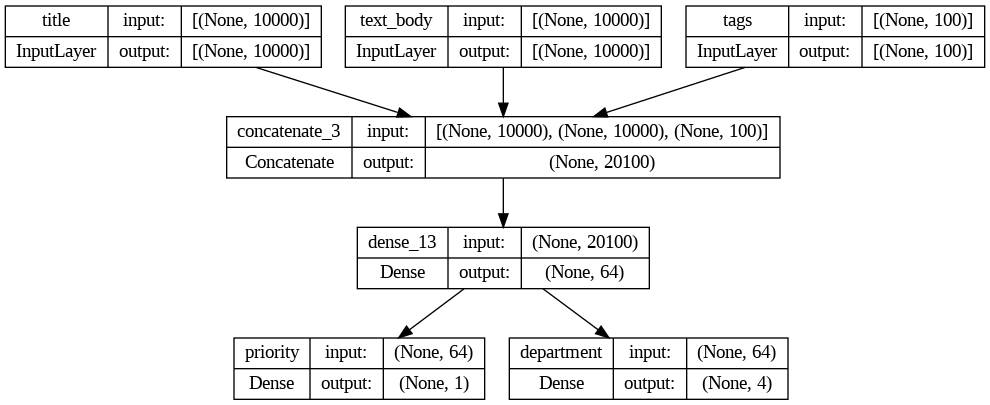

In [ ]:
keras.utils.plot_model(
    functional_model, "ticket_classifier_with_shape_info.png", show_shapes=True
)

## Subclass Model

In [ ]:
class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation="relu")
    self.priority_scorer = layers.Dense(1, activation="sigmoid")
    self.department_classifier = layers.Dense(num_departments, activation="softmax")

  def call(self, inputs):
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]

    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)

    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department


In [ ]:
# Generate dummy data
title_data = np.random.randint(0,2,size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2,size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [ ]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics =[["mean_absolute_error"], ["accuracy"]])

model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)

model.evaluate({"title":title_data,
                "text_body":text_body_data,
                "tags":tags_data},
               [priority_data, department_data])

priority_preds,department_preds = model.predict({"title": title_data,
                                                 "text_body":text_body_data,
                                                 "tags":tags_data})

40/40 [==============================] - 0s 8ms/step


In [ ]:
# Model summary
model.summary()

Model: "customer_ticket_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concatenate_5 (Concatenate  multiple                  0         
 )                                                               
                                                                 
 dense_17 (Dense)            multiple                  1286464   
                                                                 
 dense_18 (Dense)            multiple                  65        
                                                                 
 dense_19 (Dense)            multiple                  260       
                                                                 
Total params: 1286789 (4.91 MB)
Trainable params: 1286789 (4.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Conclusion: Reflect on the usages of the three APIs

### Sequential API
- **Ease of Use**: The Sequential API is straightforward and easy to use for simple, linear stacks of layers.
- **Limitations**: It lacks flexibility for more complex models with multiple inputs, outputs, or non-linear topology.

### Functional API
- **Flexibility**: The Functional API provides a flexible approach to building models, supporting complex architectures like multi-input/output, shared layers, and more.
- **Usability**: It offers a balance between ease of use and model complexity, making it the most common API used in practice.

### Subclassing API
- **Control**: The Subclassing API gives the most control over model building, allowing for the creation of highly customized models.
- **Complexity**: It requires more code and is more complex to implement, but it is very powerful for research and custom layer development.

Each API serves different needs, and the choice of which to use depends on the complexity of the model and the specific requirements of the task at hand. For me the sequential model was easier to understand and create.